# **Language Identification**

*   **Purpose**: Build a model to detect the language of a given text sample.

*   Dataset: [Language Detection](https://www.kaggle.com/datasets/basilb2s/language-detection) from Kaggle.

---
Languages (currently) included in the model:

1) English

2) Malayalam

3) Hindi

4) Tamil

5) Kannada

6) French

7) Spanish

8) Portuguese

9) Italian

10) Russian

11) Sweedish

12) Dutch

13) Arabic

14) Turkish

15) German

16) Danish

17) Greek

---


## *Import Packages*

In [41]:
# import packages
import re # regular expressions module for pattern matching & text manipulation

import pandas as pd # dataframes
import numpy as np # arrays

import seaborn as sns # visualizations
import matplotlib.pyplot as plt # more visualizations

## *Import Dataset*

In [42]:
from google.colab import drive
drive.mount('/content/drive')

filePath = "/content/drive/My Drive/Coding/Language Identification/Language Detection.csv"
df = pd.read_csv(filePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## *Data Exploration*

In [43]:
df.head() # see sample data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [75]:
df.shape

(10337, 2)

In [44]:
df["Language"].value_counts() # see number of values per language

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

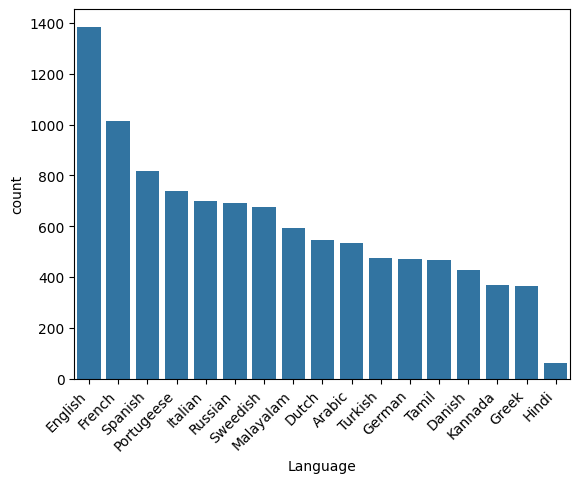

In [45]:
categoryCounts = df["Language"].value_counts()
orderedCategories = categoryCounts.index # show values from most to least

plt.xticks(rotation=45, ha='right') # make categories more legible
sns.countplot(data=df, x="Language", order=orderedCategories) # visualize dataset values

## *Assign Features*

In [46]:
X = df["Text"] # independent text data
y = df["Language"] # dependent language names

## *Label Encoding*
*   Turn our categorical variables (language names) into numerical values for training our model.



In [47]:
from sklearn.preprocessing import LabelEncoder # for encoding categorical labels into numerical values
le = LabelEncoder() # creating instance
y = le.fit_transform(y) # transforms language names into num. values

## *Data Prep*

*   Removing any irrelevant symbols & numbers within the dataset that may compromise the model's performance.



In [48]:
textList = [] # list to append pre-processed text

# iterate through text (X)
for text in X:
  text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text) # remove symbols & numbers
  text = re.sub(r'[[]]', ' ', text) # remove brackets
  text = text.lower() # convert all text to lowercase
  textList.append(text) # add all pre-processed X data to textList

In [49]:
# use CountVectorizer (Bag of Words model) to text into num. form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(textList).toarray()
X.shape

(10337, 34937)

## *Train | Test*

*   Test at 20%
*   Train at 80%





In [50]:
# split data into training and test splits
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [51]:
# Naive Bayes algorithm
from sklearn.naive_bayes import MultinomialNB # using multinomial NB b/c these data are words counts in text classification
model = MultinomialNB() # creates instance of classifier model to be trained
model.fit(x_train, y_train) # x_train = input features; y_train = target labels

MultinomialNB()

In [52]:
y_prediction = model.predict(x_test) # predict test set

## *Evaluation*

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
accuracy = accuracy_score(y_test, y_prediction) # compares true and predicted labels & computes proportion of correct predictions
confusion_m = confusion_matrix(y_test, y_prediction) # table to summarize model's performance

print("Accuracy: ", accuracy)

Accuracy:  0.97678916827853


**Model accuracy of 97%**
- - - - - -

## *Confusion Matrix*

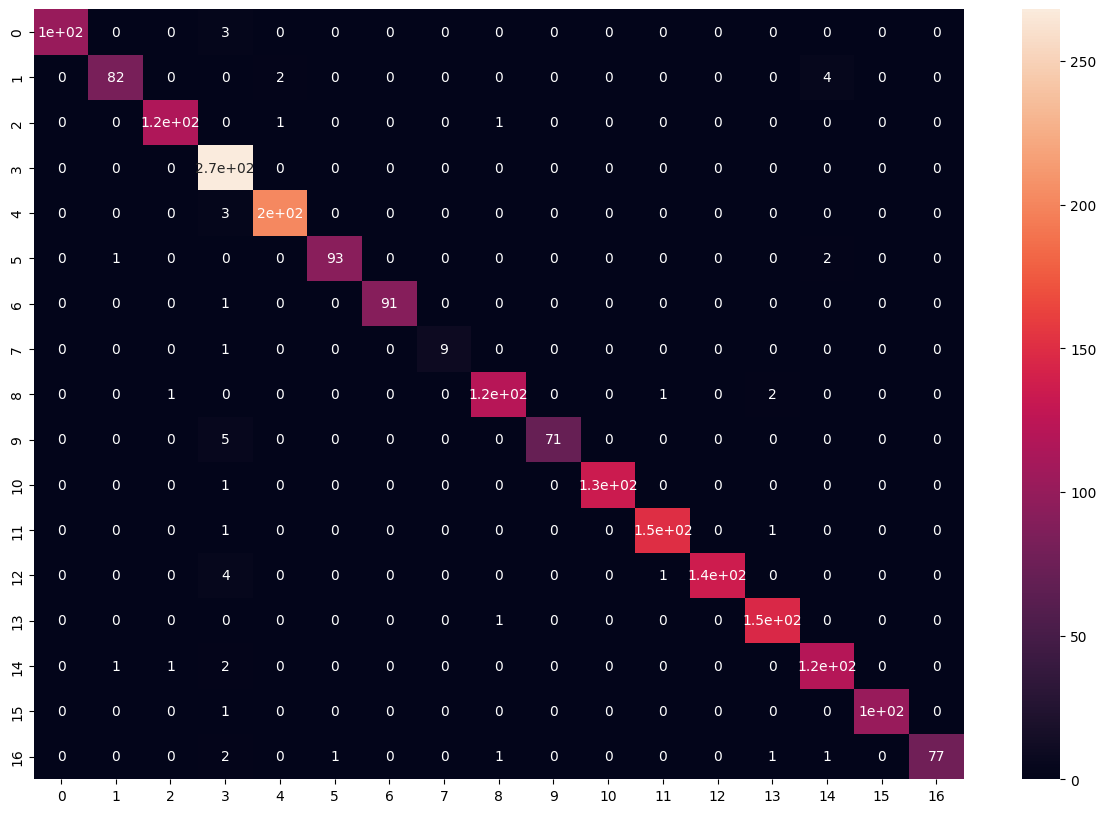

In [59]:
# plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_m, annot=True)
plt.show()

## *Function Creation & Testing*

In [61]:
def lang_predict(text):
  x = cv.transform([text]).toarray() # cv = CountVectorizer converting text to Bag of Words model
  lang = model.predict(x)
  lang = le.inverse_transform(lang) # lang is storing predicted language
  print("The language is in",lang[0])

In [71]:
# testing lang_predict call
lang_predict("Hello world")
lang_predict("Hola mundo")
lang_predict("Bonjour le monde")
lang_predict("Привет, мир")
lang_predict("ഹലോ വേൾഡ്")
lang_predict("Olá Mundo")
lang_predict("مرحبا بالعالم")
lang_predict("Ciao mondo")

The language is in English
The language is in Spanish
The language is in French
The language is in Russian
The language is in Malayalam
The language is in Portugeese
The language is in Arabic
The language is in Italian


# **Final Function**
*   Leave text sample here to detect the language!



In [ ]:
lang_predict("")

---